<a href="https://colab.research.google.com/github/msmsm104/TIL/blob/main/20220602/%EA%B5%AC%EB%A7%A4_%EC%9A%94%EC%9D%B8_%EB%B6%84%EC%84%9D_(Decision_Tree)_0602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 - 패스트 캠퍼스 기업강의(파이썬을 활용한 이커머스 데이터 분석 올인원 패키지 Online.)
 - Chapter5. Decision Tree

## 모듈 및 데이터 로딩

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
base_path = '/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/TIL(Today I Learned)/20220602/'

data = pd.read_csv(base_path + 'galaxy.csv')
data.tail(2)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1483,0,89.00,None,Midnight Black,Galaxy_S7,no description,92,2,1
1484,0,119.99,AT&T,Midnight Black,Galaxy_S7,no description,96,5,0


## 데이터 특성 확인하기

In [63]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [65]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

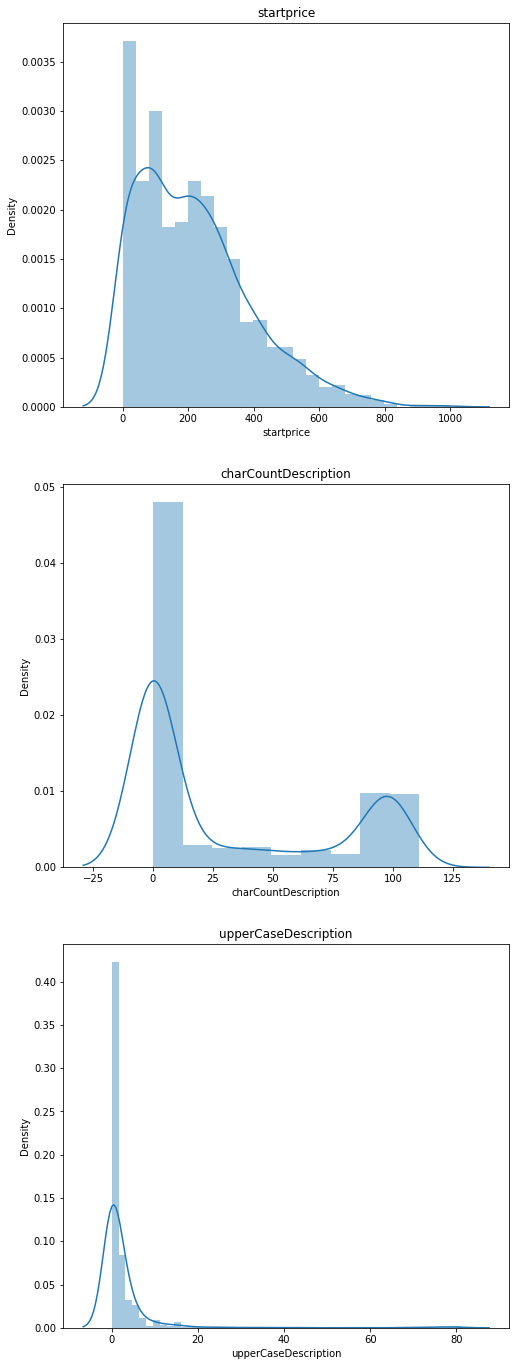

In [66]:
f, ax = plt.subplots(3, 1, figsize=(8, 24))

sns.distplot(data['startprice'], ax=ax[0])
ax[0].set_title('startprice')
sns.distplot(data['charCountDescription'], ax=ax[1])
ax[1].set_title('charCountDescription')
sns.distplot(data['upperCaseDescription'], ax=ax[2])
ax[2].set_title('upperCaseDescription')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


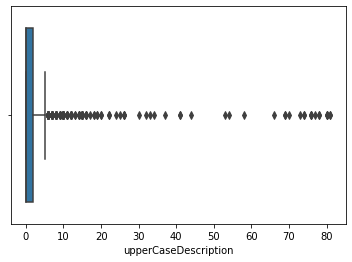

In [67]:
sns.boxplot(data['upperCaseDescription'])

In [68]:
len(data[data['upperCaseDescription']>15])

47

In [69]:
deleted_idx = data[data['upperCaseDescription']>15].index

In [70]:
data = data.drop(index=deleted_idx)

In [71]:
len(data)

1438

<function matplotlib.pyplot.show>

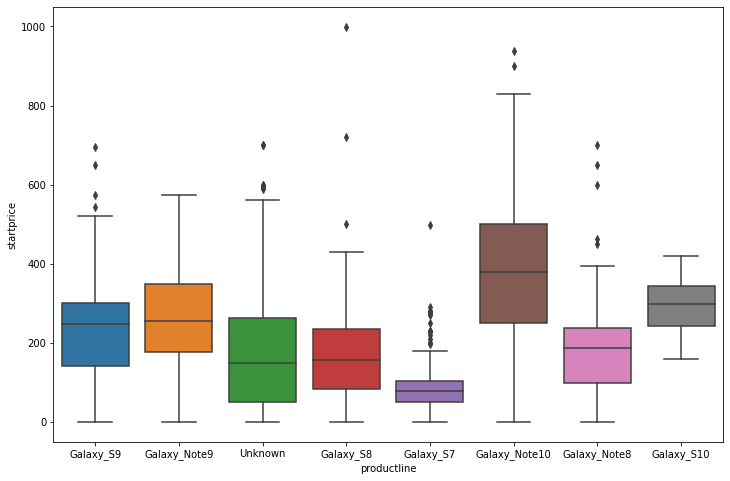

In [72]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='productline', y='startprice', data=data)

plt.show

## Missing Value 처리하기

In [73]:
data.isna().sum() / len(data) * 100

BuyItNow                 0.000000
startprice               0.000000
carrier                 20.445063
color                   40.055633
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

In [74]:
data = data.fillna('Unknown')

In [75]:
data.isna().sum()

BuyItNow                0
startprice              0
carrier                 0
color                   0
productline             0
noDescription           0
charCountDescription    0
upperCaseDescription    0
sold                    0
dtype: int64

## 카테고리 변수 처리

In [76]:
data[['carrier', 'color', 'productline', 'noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [77]:
data['carrier'].value_counts()

None               840
Unknown            294
AT&T               173
Verizon             81
Sprint/T-Mobile     50
Name: carrier, dtype: int64

In [78]:
data['color'].value_counts()

Unknown           576
White             315
Midnight Black    264
Space Gray        177
Gold               50
Black              36
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [79]:
data['productline'].value_counts()

Galaxy_Note10    342
Galaxy_S8        268
Galaxy_S7        222
Unknown          199
Galaxy_Note8     151
Galaxy_S9        147
Galaxy_Note9     102
Galaxy_S10         7
Name: productline, dtype: int64

In [80]:
data['noDescription'].value_counts()

contains description    856
no description          582
Name: noDescription, dtype: int64

In [81]:
# def black(x):
#     if 'Black' in x:
#         return 'Black'

data['color'] = data['color'].map(lambda x: 'Black' if 'Black' in x else x)

In [82]:
data['color'].value_counts()

Unknown       576
Black         320
White         315
Space Gray    177
Gold           50
Name: color, dtype: int64

In [83]:
data['carrier'] = data['carrier'].map(lambda x: 'Unknown' if x == 'None' else x)

In [84]:
data['carrier'].value_counts()

Unknown            1134
AT&T                173
Verizon              81
Sprint/T-Mobile      50
Name: carrier, dtype: int64

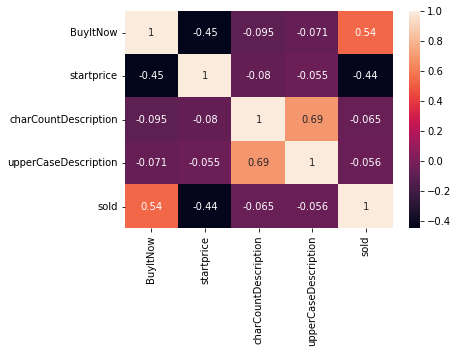

In [85]:
## categorical feature --> One-Hot Encoding

# pd.get_dummies(data=data, columns=['carrier', 'color', 'productline', 'noDescription'], drop_first=True)

sns.heatmap(data.corr(), annot=True)

In [86]:
data_OHE = pd.get_dummies(data=data, columns=['carrier', 'color', 'productline', 'noDescription'], drop_first=True)
data_OHE

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Gold,color_Space Gray,color_Unknown,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,0,199.99,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,235.00,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
2,0,199.99,100,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1
3,1,175.00,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1,100.00,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,96,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1481,0,239.95,97,5,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1482,0,329.99,93,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1483,0,89.00,92,2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


## 모델링

In [87]:
from sklearn.model_selection import train_test_split

X = data_OHE.drop(columns='sold')
y = data_OHE['sold']
X.shape, y.shape

((1438, 19), (1438,))

In [88]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

In [89]:
X_train

,BuyItNow,startprice,charCountDescription,upperCaseDescription,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Gold,color_Space Gray,color_Unknown,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
347,1,1.00,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
742,0,829.99,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1386,1,0.99,41,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
482,1,150.00,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1143,0,8.99,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,100.00,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1256,0,380.00,41,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
517,0,89.99,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1164,1,215.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [30]:
# numeric_data = X_train[['startprice', 'charCountDescription', 'upperCaseDescription']]

In [31]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(numeric_data)
# scaled_data

array([[0.000991  , 0.        , 0.        ],
       [0.83081913, 0.        , 0.        ],
       [0.00098099, 0.36936937, 0.13333333],
       ...,
       [0.09007097, 0.        , 0.        ],
       [0.21520736, 0.        , 0.        ],
       [0.07506582, 0.        , 0.        ]])

In [32]:
# X_train[['startprice', 'charCountDescription', 'upperCaseDescription']] = scaled_data

In [33]:
# X_train

,BuyItNow,startprice,charCountDescription,upperCaseDescription,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Gold,color_Space Gray,color_Unknown,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
347,1,0.000991,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
742,0,0.830819,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1386,1,0.000981,0.369369,0.133333,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
482,1,0.150142,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1143,0,0.008989,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0.100091,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1256,0,0.380374,0.369369,0.200000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
517,0,0.090071,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1164,1,0.215207,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [34]:
# numeric_data_2 = X_test[['startprice', 'charCountDescription', 'upperCaseDescription']]
# numeric_data_2

,startprice,charCountDescription,upperCaseDescription
1426,80.00,0,0
1039,214.99,99,2
1265,175.00,0,0
959,624.99,0,0
1074,125.00,101,1
...,...,...,...
1301,39.00,0,0
1380,36.95,70,10
919,155.00,0,0
639,249.99,0,0


In [35]:
# scaled_data_2 = scaler.transform(numeric_data_2)

In [36]:
# X_test[['startprice', 'charCountDescription', 'upperCaseDescription']] = scaled_data_2
# X_test

,BuyItNow,startprice,charCountDescription,upperCaseDescription,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Gold,color_Space Gray,color_Unknown,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
1426,1,0.080071,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1039,0,0.215197,0.891892,0.133333,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
1265,0,0.175167,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
959,0,0.625612,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1074,1,0.125116,0.909910,0.066667,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1,0.039029,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1380,0,0.036977,0.630631,0.666667,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
919,0,0.155147,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
639,0,0.250233,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


---

In [90]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

## 예측

In [91]:
pred = model.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0])

## 평가

In [92]:
## 해당 데이터의 경우 target value가 편향되어 있지 않기 때문에 모델의 성능을 평가할때 accuracy score만 사용해도 어느정도 객관적인 평가가 가능하다.!!

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

accuracy_score(y_test, pred), f1_score(y_test, pred)

(0.7743055555555556, 0.7368421052631579)

In [93]:
confusion_matrix(y_test, pred)

array([[132,  29],
       [ 36,  91]])

In [94]:
## 학습에 대한 성능평가
accuracy_score(y_train, model.predict(X_train))

0.8982608695652174

## 최적의 max_depth 찾기 (hyper-parameter tuning)

In [95]:
acc_lst = []
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc_lst.append(accuracy_score(y_test, pred))
    print(i, round(accuracy_score(y_test, pred), 4))

2 0.7951
3 0.8125
4 0.8021
5 0.7917
6 0.809
7 0.7951
8 0.7847
9 0.7882
10 0.7778
11 0.7778
12 0.7674
13 0.7674
14 0.7674
15 0.7639
16 0.7396
17 0.7569
18 0.7361
19 0.7396
20 0.7292
21 0.7326
22 0.7188
23 0.7292
24 0.7257
25 0.7222
26 0.7361
27 0.7222
28 0.7049
29 0.7361
30 0.7292


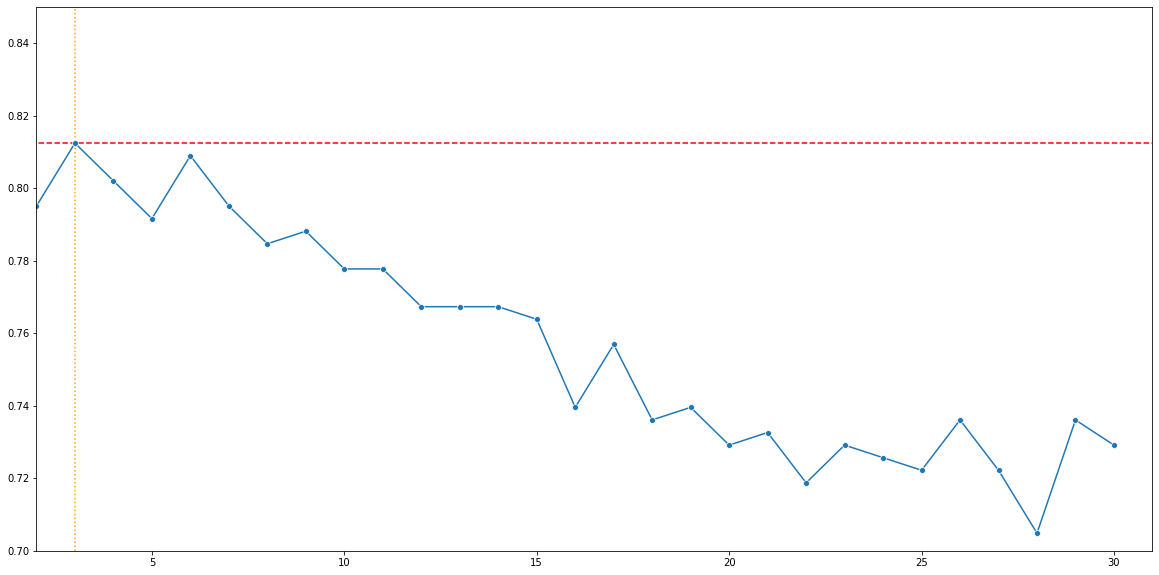

In [96]:
f, ax = plt.subplots(1, 1, figsize = (20, 10))

sns.lineplot(x=range(2, 30+1), y=acc_lst, marker='o')

ax.vlines(np.array(acc_lst).argmax()+2, 0.7, 0.85, linestyle=':', color='orange')
ax.hlines(max(acc_lst), 0, 31, linestyle='--', color='red')

plt.xlim(2, 31)
plt.ylim(0.7, 0.85)

plt.show()

## 최적의 max_depth를 사용하여 다시 모델링 후 평가

In [97]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8125

In [98]:
confusion_matrix(y_test, pred)

array([[135,  26],
       [ 28,  99]])

## Tree plot 만들기

In [99]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'BuyItNow <= 0.5\n0.499\n1150\n[606, 544]'),
 Text(0.25, 0.625, 'startprice <= 251.44\n0.362\n629\n[480, 149]'),
 Text(0.125, 0.375, 'carrier_Unknown <= 0.5\n0.42\n300\n[210, 90]'),
 Text(0.0625, 0.125, '0.497\n65\n[35, 30]'),
 Text(0.1875, 0.125, '0.38\n235\n[175, 60]'),
 Text(0.375, 0.375, 'startprice <= 504.5\n0.294\n329\n[270, 59]'),
 Text(0.3125, 0.125, '0.331\n258\n[204, 54]'),
 Text(0.4375, 0.125, '0.131\n71\n[66, 5]'),
 Text(0.75, 0.625, 'startprice <= 177.0\n0.367\n521\n[126, 395]'),
 Text(0.625, 0.375, 'startprice <= 89.495\n0.225\n363\n[47, 316]'),
 Text(0.5625, 0.125, '0.131\n242\n[17, 225]'),
 Text(0.6875, 0.125, '0.373\n121\n[30, 91]'),
 Text(0.875, 0.375, 'productline_Galaxy_S8 <= 0.5\n0.5\n158\n[79, 79]'),
 Text(0.8125, 0.125, '0.495\n142\n[64, 78]'),
 Text(0.9375, 0.125, '0.117\n16\n[15, 1]')]

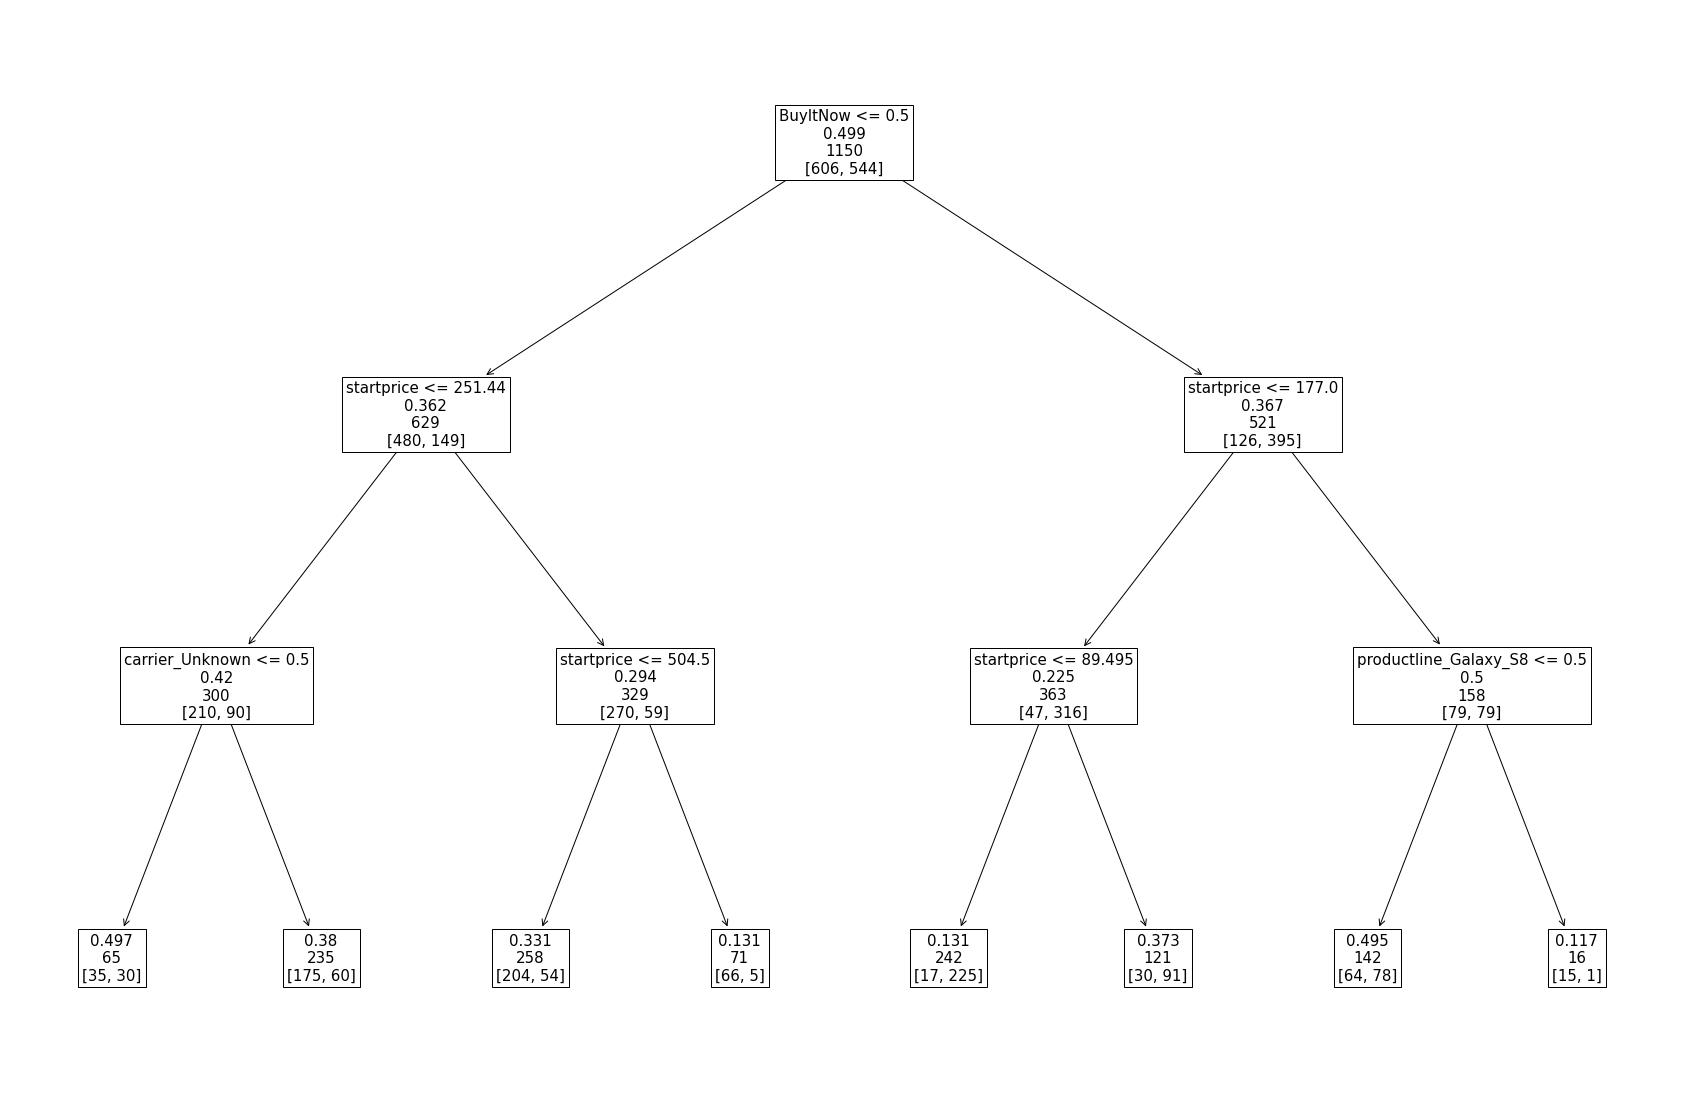

In [100]:
plt.figure(figsize=(30, 20))
plot_tree(model, feature_names=X_train.columns, fontsize=15, label=None)